This notebook was generated for TensorFlow 2.6.

## Modern convnet architecture patterns using Modularity, hierarchy, and reusability
We use residual connections

### Residual connections

**What is a Residual Block?**

A residual block is a building block of a neural network that includes a "shortcut" or "skip" connection. This connection allows the input of the block to be added directly to the output of the layers within the block.

Visually, a typical residual block can be represented as:

`Output = Activation(Input + F(Input))`

Where:

- `Input` is the input to the residual block.
- `F(Input)` represents the operations within the main path of the block (e.g., convolutional layers, batch normalization, activations).
- `+` denotes the element-wise addition of the input and the output of the main path.
- `Activation` is typically a non-linear activation function applied after the addition.



**Purpose of a Residual Block**

The primary purpose of residual blocks is to enable the training of very deep neural networks. As networks become deeper, they are susceptible to several issues, most notably the vanishing gradient problem and the degradation problem (where increasing depth leads to higher training error).

Residual blocks address these issues by:

1. **Facilitating Identity Mapping:** The shortcut connection allows the network to easily learn an identity function. If the optimal mapping for a block is simply to pass the input through unchanged, the main path (F(Input)) can learn to output nearly zero. Adding this to the input (Input + 0) results in the output being approximately equal to the input. This makes it easier for the network to learn more complex functions by building upon simpler, identity mappings.

2. **Alleviating Vanishing Gradients:** The shortcut connection provides an alternative path for the gradient to flow during backpropagation. Instead of having to propagate through multiple layers in the main path, the gradient can flow directly through the shortcut. This direct path helps to prevent the gradient from becoming too small (vanishing), which is crucial for training deep networks effectively.

3. **Improving Learning Efficiency:** By making it easier to learn identity mappings and facilitating gradient flow, residual blocks allow deeper networks to learn more complex representations and achieve better performance compared to similarly deep networks without residual connections.

**Residual block where the number of filters changes**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
# Apply standard 2D convolutional layer with 64 filters and a 3x3 kernel to the input x.
# This changes the number of filters (channels) from the previous layer's output (which was 32) to 64.
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# Apply a 1x1 convolution to the residual connection to match the number of filters
# It applies a 1x1 convolutional layer to the original residual input.
# A 1x1 convolution doesn't change the spatial dimensions (height and width) of the input.
# Its primary purpose here is to change the number of filters (channels) of the residual connection to match the number of filters in the output of the x branch (which is 64).
# By making the number of filters in the residual connection the same as the main x branch, we ensure that they can be added together in the next step.
residual = layers.Conv2D(64, 1)(residual)
x = layers.add([x, residual])

In [ ]:
model = keras.Model(inputs=inputs, outputs=x)

# Display the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 30, 30,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 30, 30,    │     18,496 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 30, 30,    │      2,112 │ conv2d_9[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 30,    │          0 │ conv2d_10[0][0],  │
│                     │ 64)               │            │ conv2d_11[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,504 (84.00 KB)

 Trainable params: 21,504 (84.00 KB)

 Non-trainable params: 0 (0.00 B)

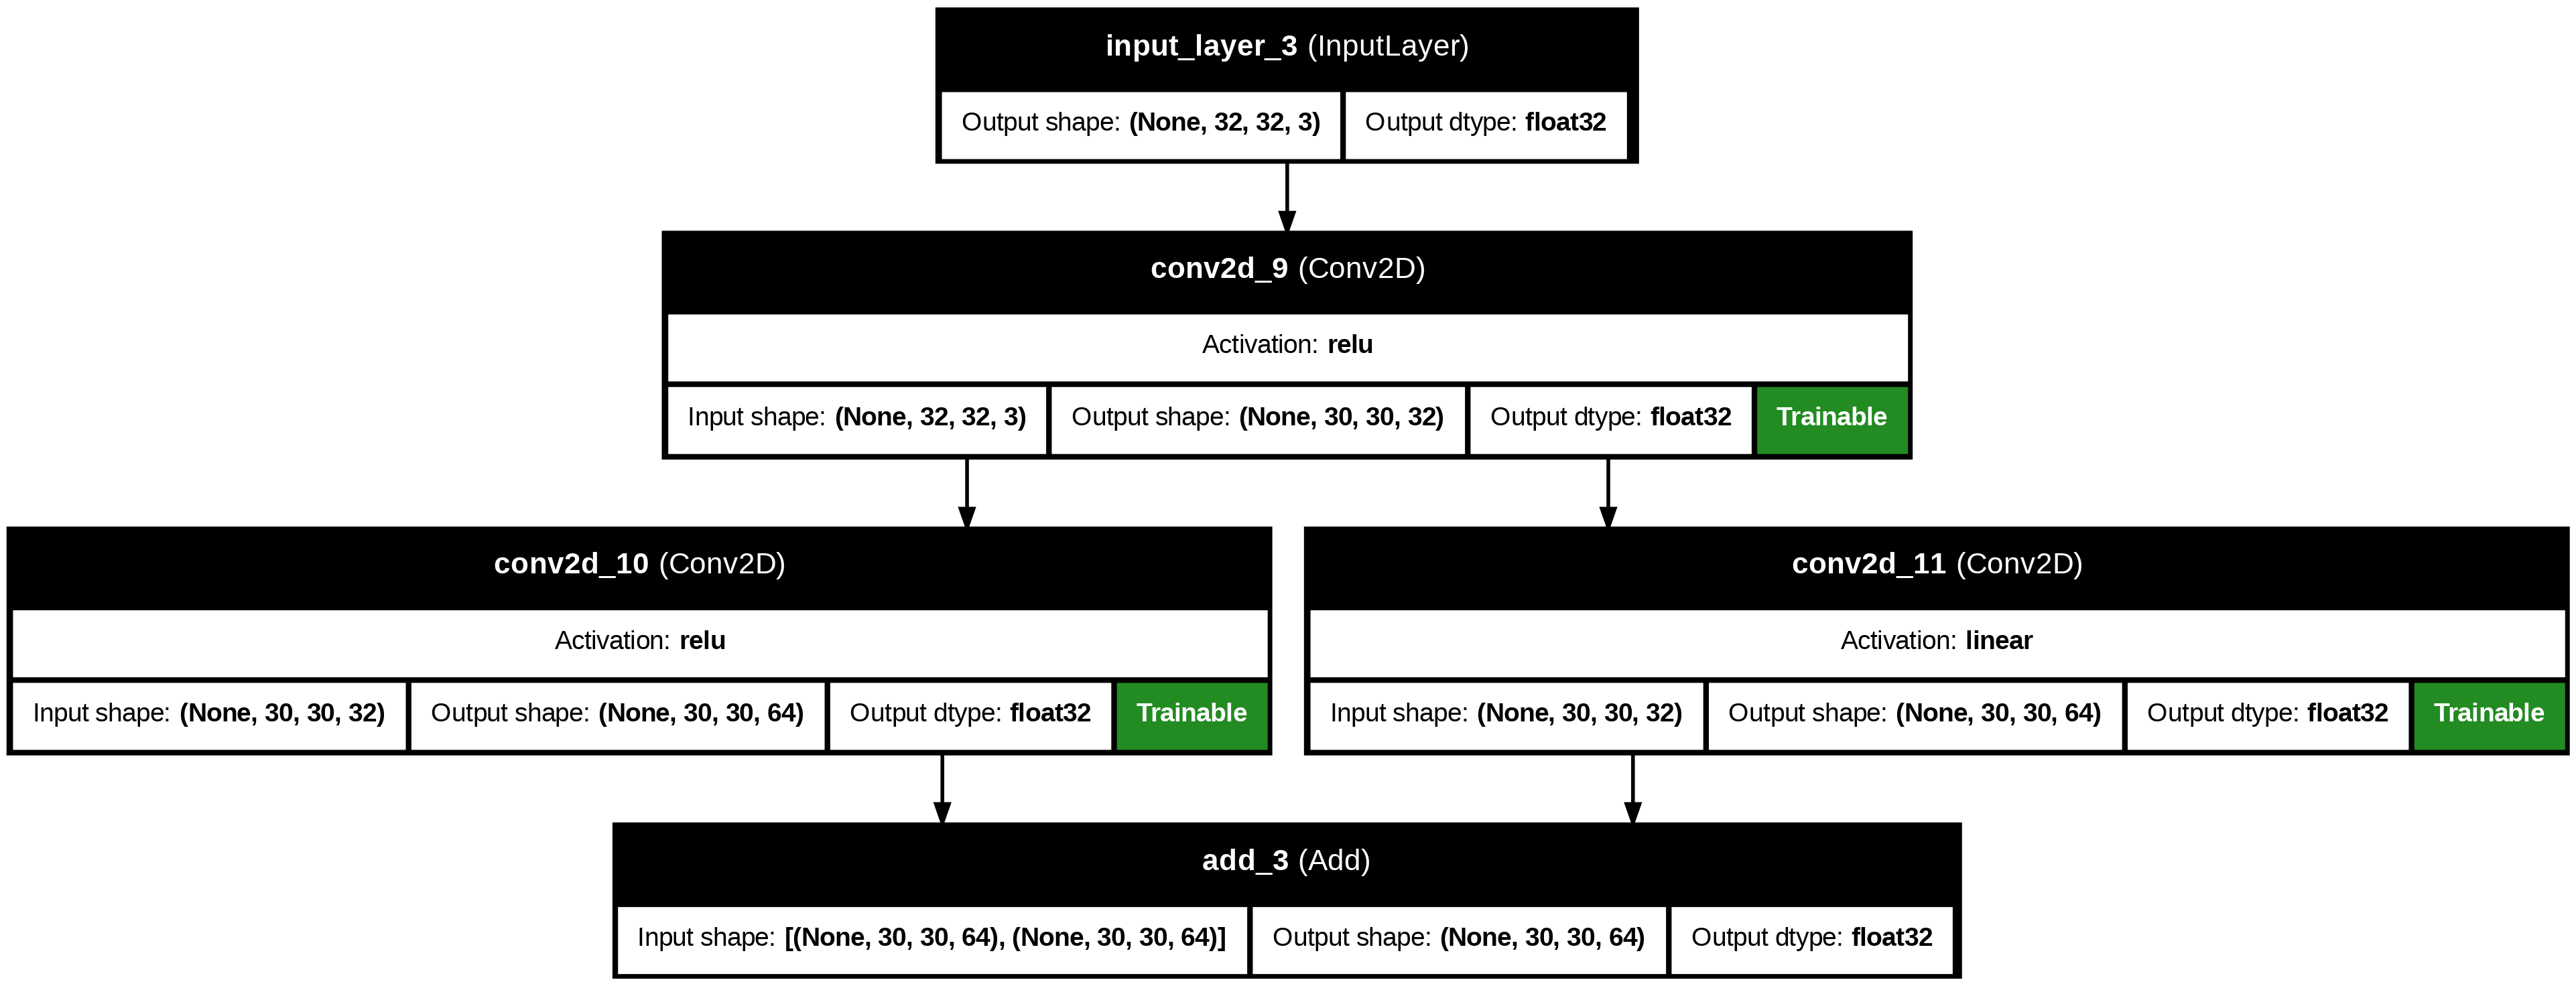

In [ ]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

**Case where target block includes a max pooling layer**

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
residual = layers.Conv2D(64, 1, strides=2)(residual)
x = layers.add([x, residual])

In [ ]:
model = keras.Model(inputs=inputs, outputs=x)

# Display the model summary
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 30, 30,    │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 30, 30,    │     18,496 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 15, 15,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 15, 15,    │      2,112 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 15, 15,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │ conv2d_14[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,504 (84.00 KB)

 Trainable params: 21,504 (84.00 KB)

 Non-trainable params: 0 (0.00 B)

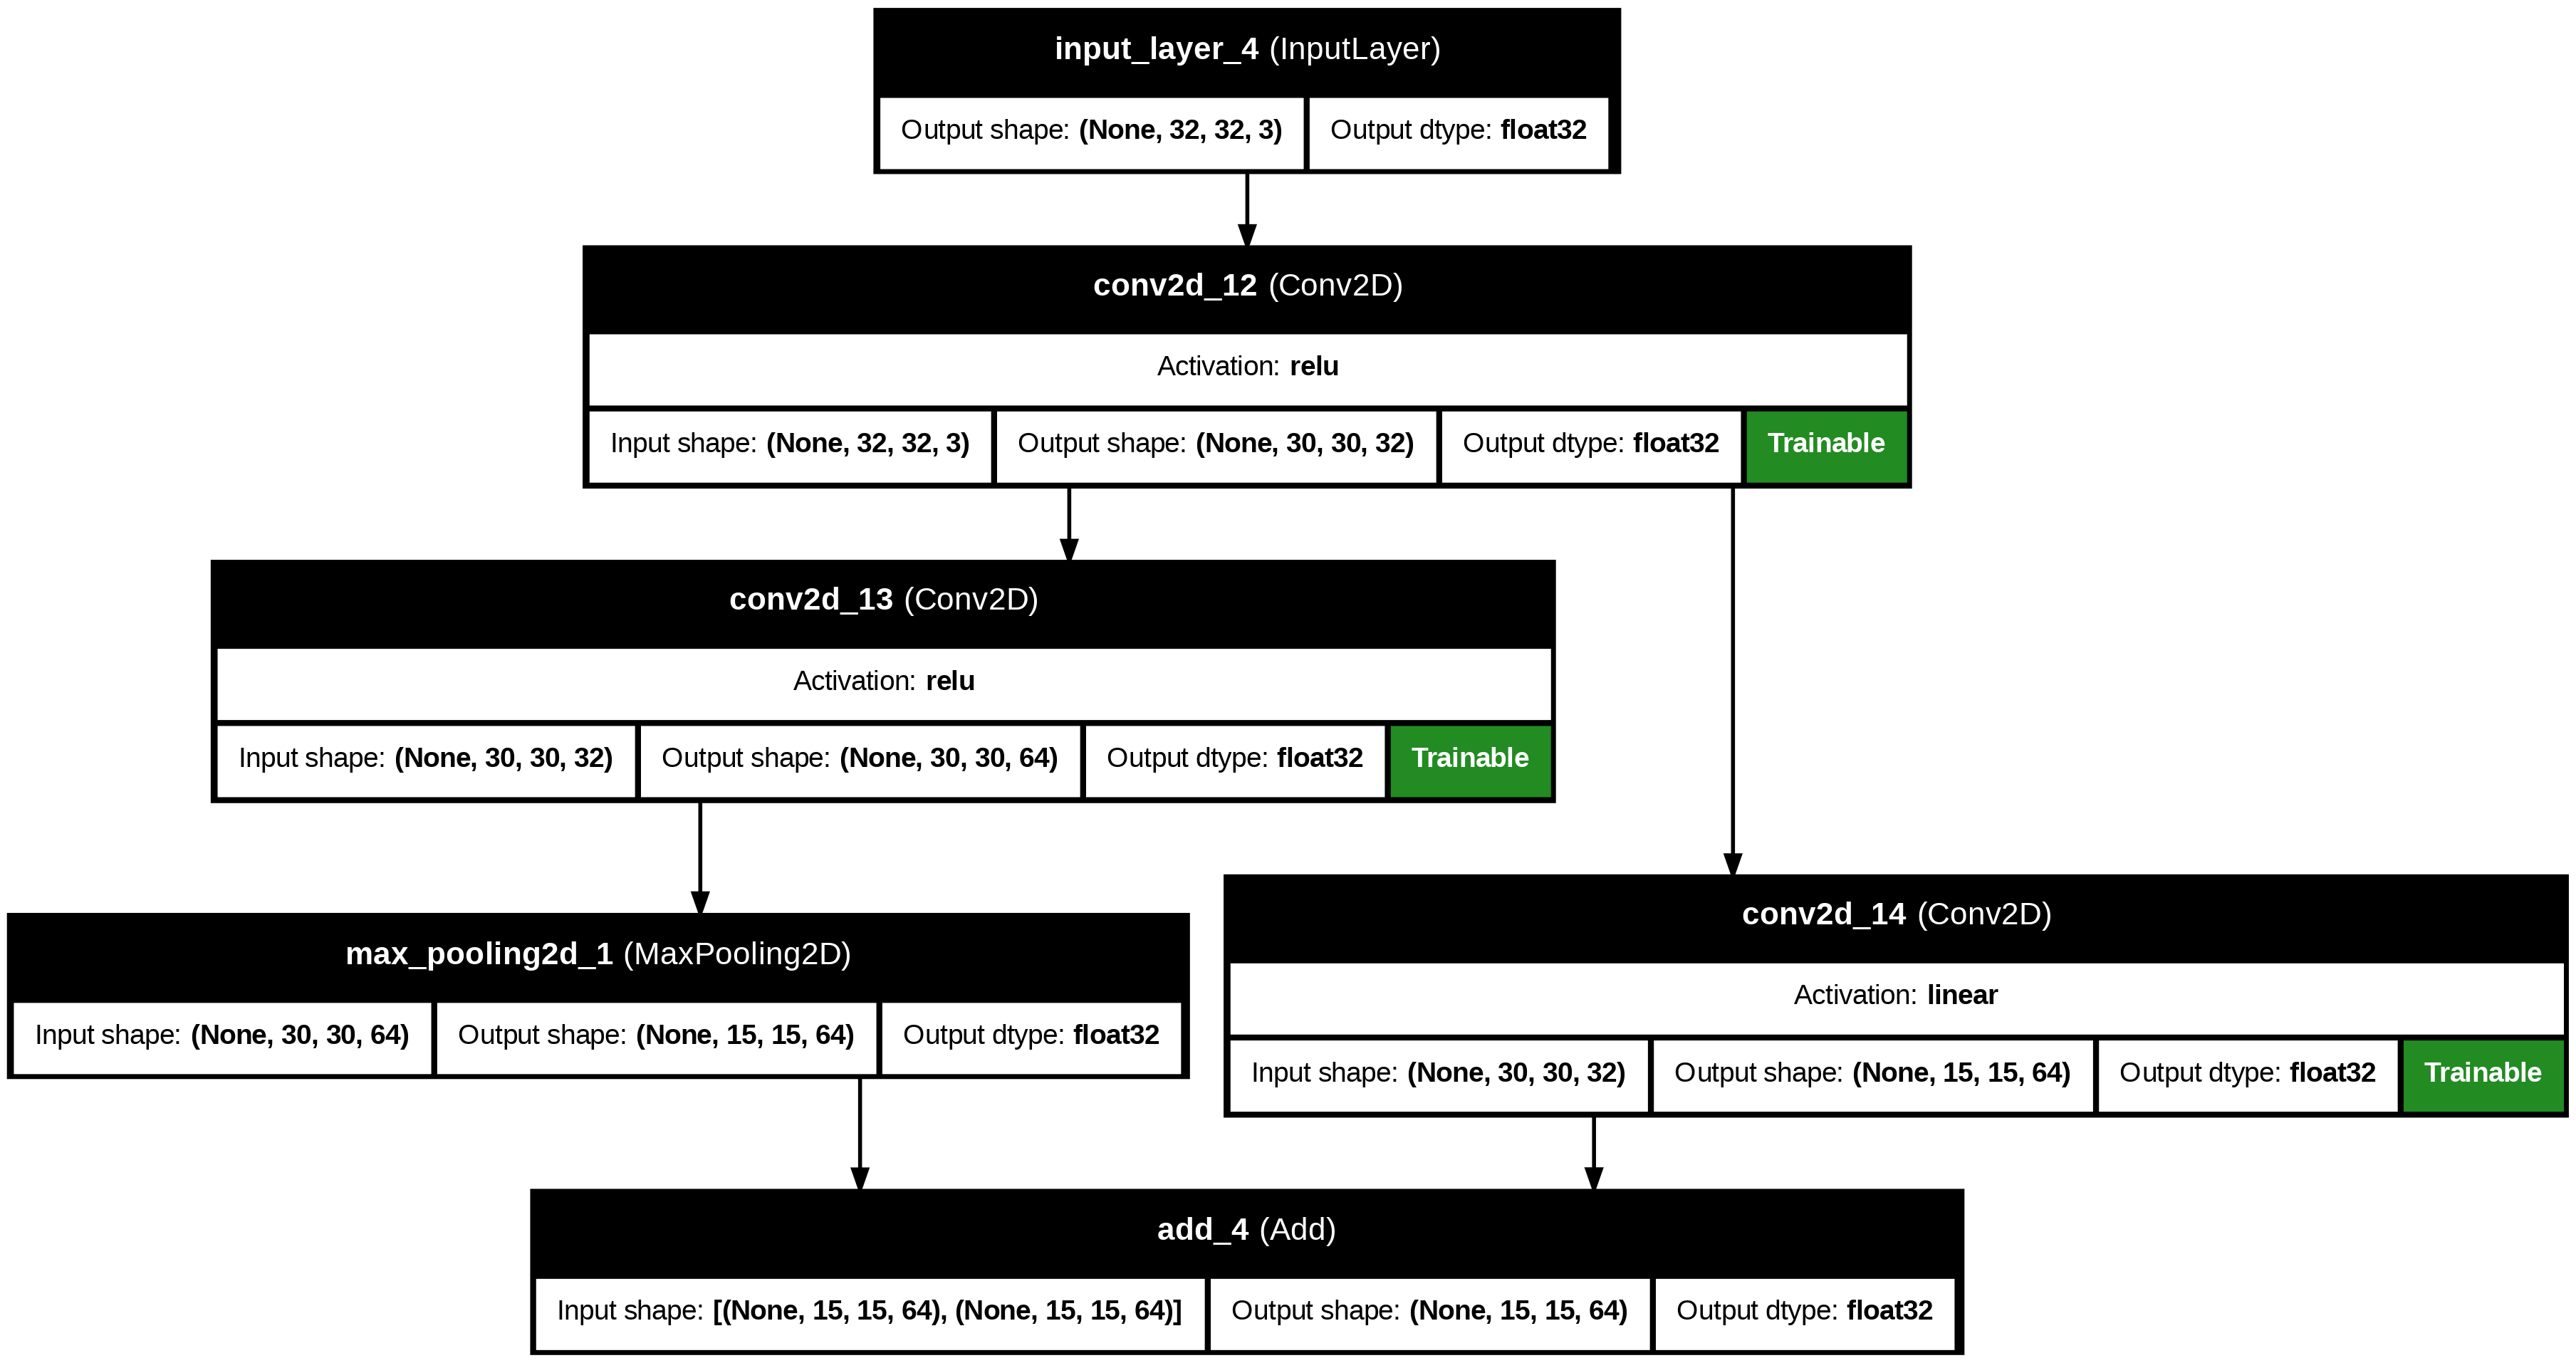

In [ ]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape for the residual block
input_shape = (64, 64, 32) # Example input shape: 64x64 image with 32 channels

# Define the number of filters for the convolutional layers within the block
filters = 64

# --- Start of Residual Block Definition ---

# Define the input layer for the block. This is the tensor coming into the residual block.
inputs = keras.Input(shape=input_shape)

# Store the input to the block as the residual connection.
# This will be added to the output of the convolutional layers later.
residual = inputs

# First convolutional layer in the main path
x = layers.Conv2D(filters, kernel_size=3, strides=1, padding="same")(inputs)
x = layers.BatchNormalization()(x)  # Apply Batch Normalization
x = layers.Activation("relu")(x)     # Apply ReLU activation

# Second convolutional layer in the main path
x = layers.Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)  # Apply Batch Normalization

# Adjust the residual connection if the number of filters changed.
# This is done with a 1x1 convolution.
# This step is only needed if the number of filters in the main path is different from the input filters.
# In this example, we are increasing the filters from 32 (input) to 64 (output).
if filters != input_shape[-1]:
    residual = layers.Conv2D(filters, kernel_size=1, strides=1, padding="same")(residual)
    # Batch Normalization is often applied to the shortcut connection as well
    residual = layers.BatchNormalization()(residual)


# Add the residual connection to the output of the main path
x = layers.add([x, residual])

# Apply the final activation after adding the residual connection
x = layers.Activation("relu")(x)

# The output of the residual block is the tensor after the final activation.
outputs = x

# Create a Keras Model for this residual block
# This allows us to treat the block as a single layer and get its summary.
residual_block_model = keras.Model(inputs=inputs, outputs=outputs)

# --- End of Residual Block Definition ---

# Display the summary of the residual block model
print("Summary of the Residual Block:")
residual_block_model.summary()

# You can then use this 'residual_block_model' as a layer in a larger model.
# For example:
# main_model_inputs = keras.Input(shape=(224, 224, 3))
# x = layers.Conv2D(32, 7, strides=2, padding="same")(main_model_inputs)
# x = residual_block_model(x) # Use the residual block here
# x = residual_block_model(x) # And again
# ... and so on.

Summary of the Residual Block:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64,    │          0 │ -                 │
│ (InputLayer)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 64, 64,    │     18,496 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 64,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 64,    │      2,112 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 64, 64,    │          0 │ add_5[0][0]       │
│ (Activation)        │ 64)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 57,920 (226.25 KB)

 Non-trainable params: 384 (1.50 KB)

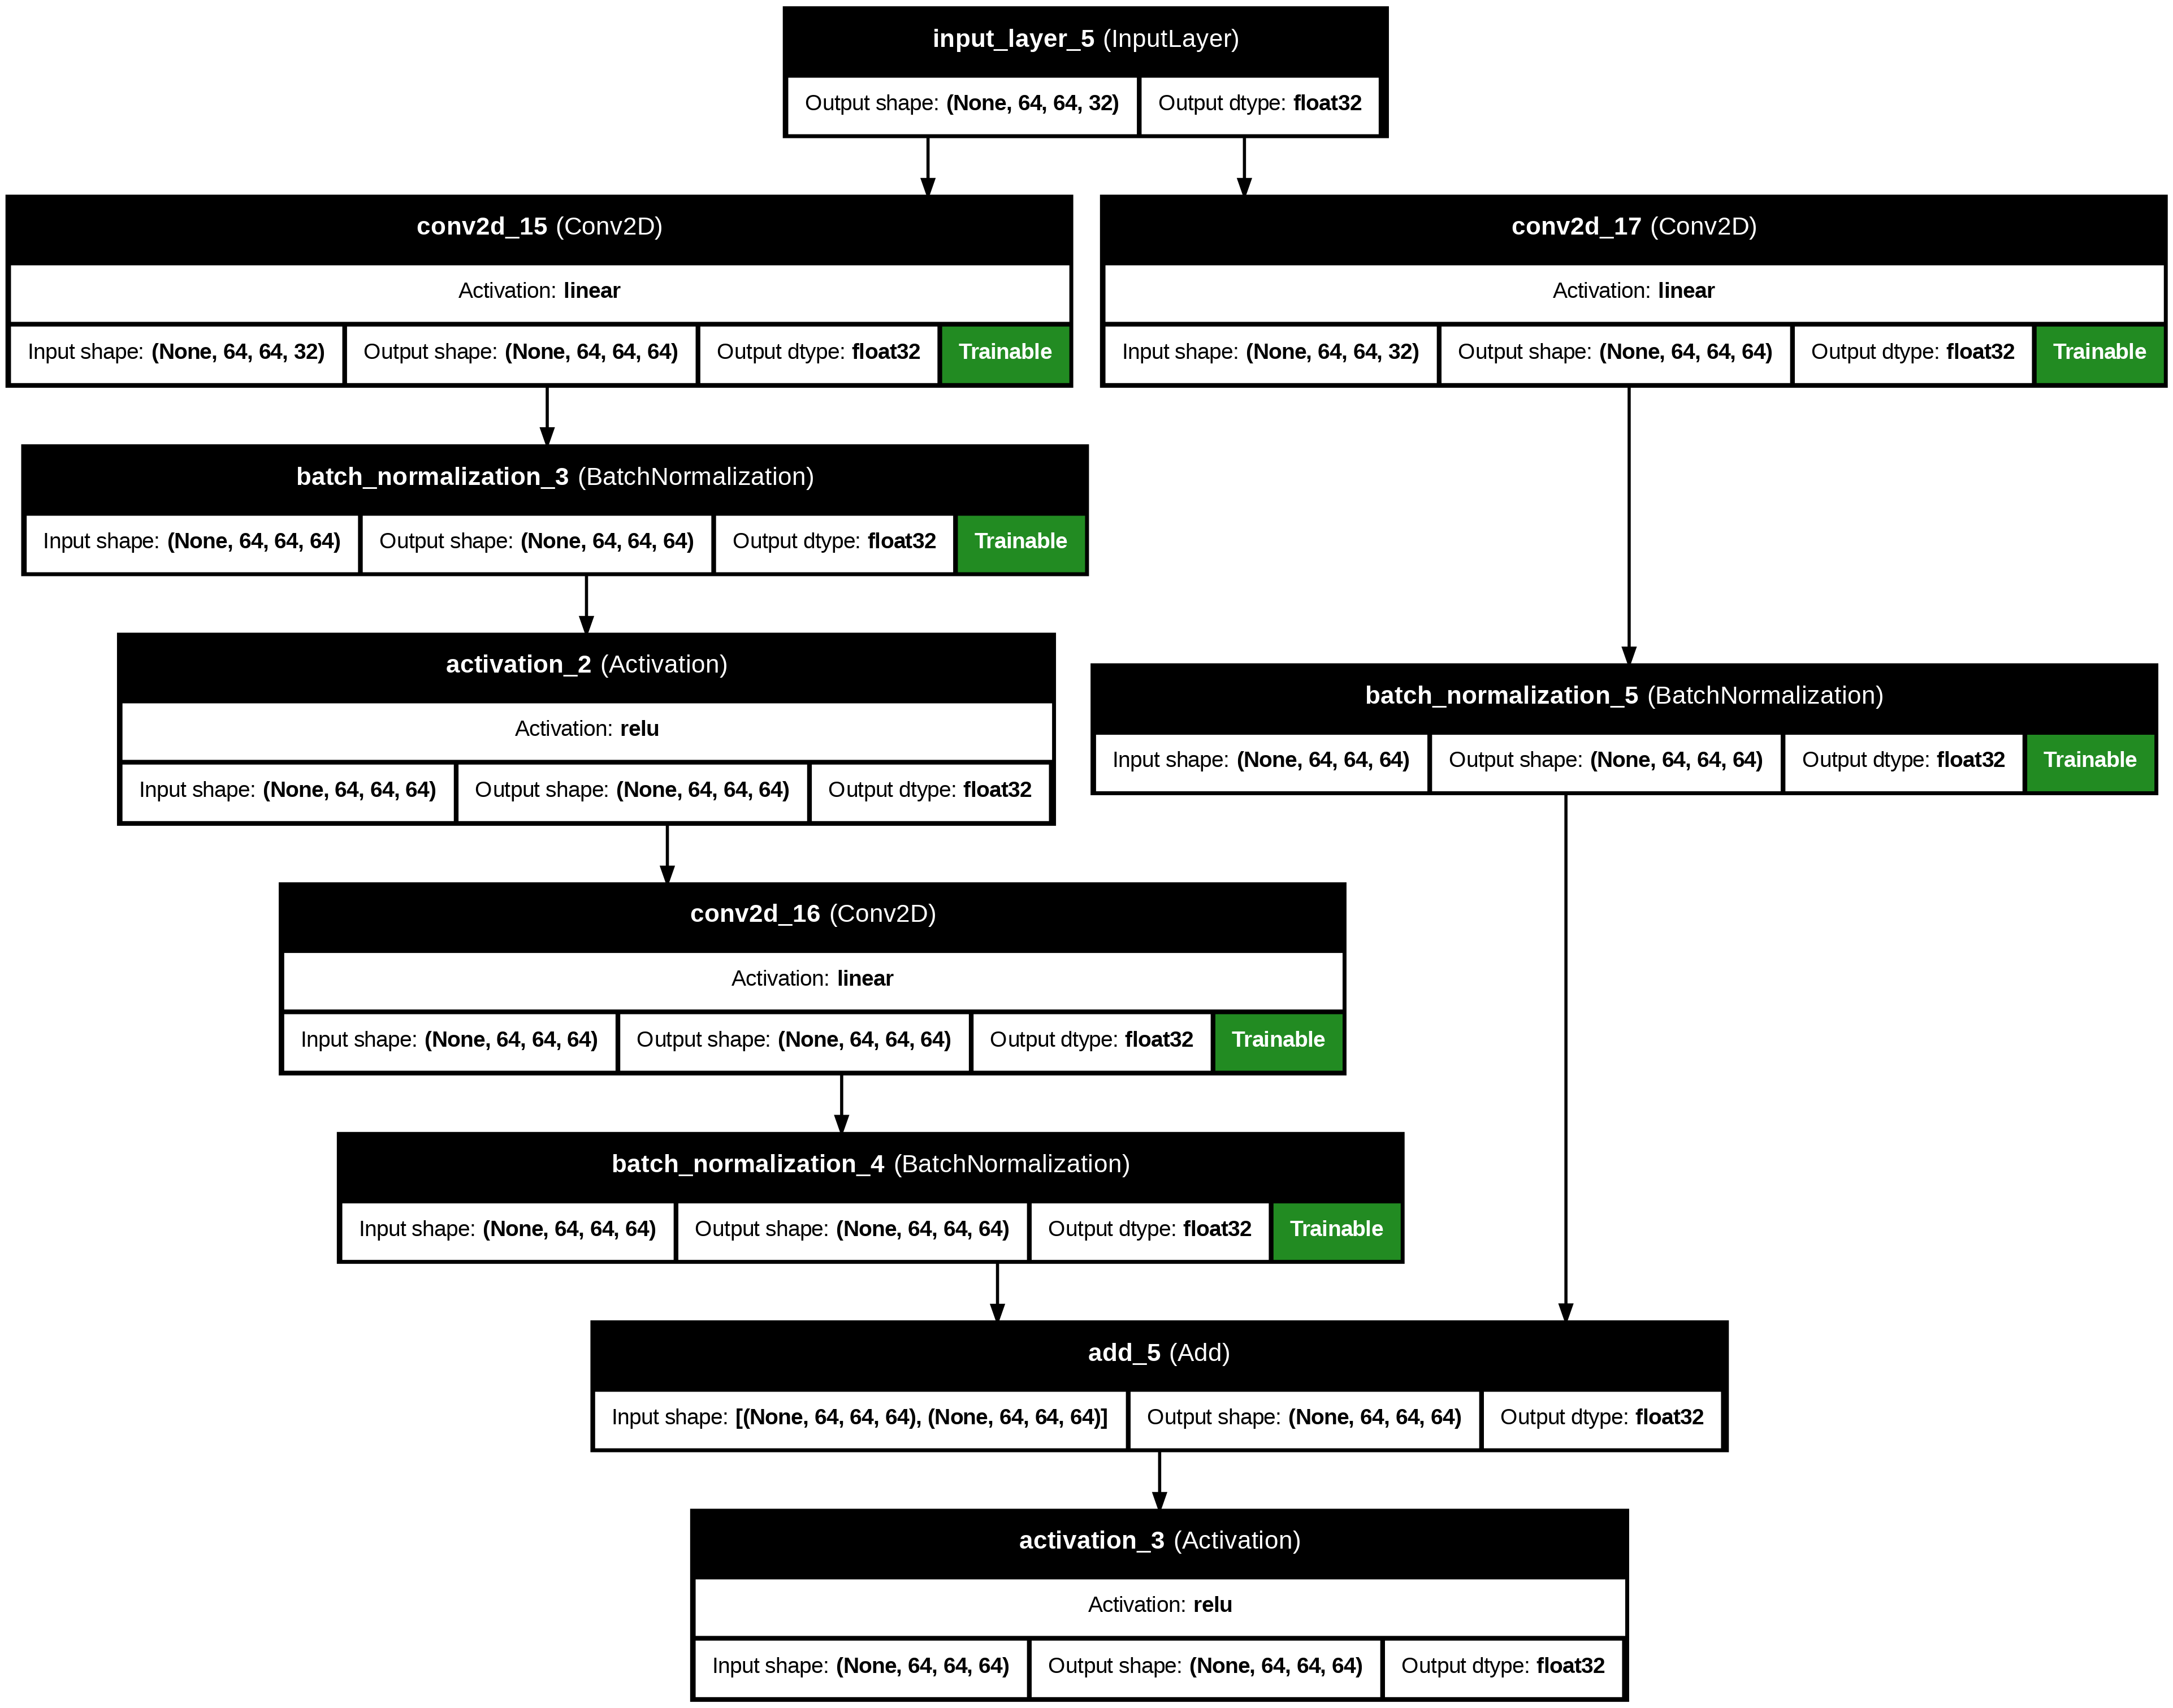

In [ ]:
import keras
keras.utils.plot_model(
    residual_block_model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,

)

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 32, 32, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 16, 32)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 32)     │            128 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 16, 16, 32)     │              0 │ max_pooling2d_1[0][0], │
│                           │                        │                │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 8, 8, 64)       │              0 │ conv2d_10[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 8, 8, 64)       │          2,112 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 8, 8, 64)       │              0 │ max_pooling2d_2[0][0], │
│                           │                        │                │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 8, 8, 128)      │         73,856 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 8, 8, 128)      │        147,584 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 8, 8, 128)      │          8,320 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 8, 8, 128)      │              0 │ conv2d_13[0][0],       │
│                           │                        │                │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_poolin

 Total params: 297,697 (1.14 MB)

 Trainable params: 297,697 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

### Batch normalization

### Depthwise separable convolutions

### Putting it together: A mini Xception-like model

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!rm kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download -c dogs-vs-cats
!kaggle datasets download -d salader/dogs-vs-cats
!unzip -qq /content/dogs-vs-cats.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:12<00:00, 110MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.4MB/s]


In [ ]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory

original_dir = pathlib.Path("/content/train")


def no_of_files(dir):
  count = 0
  for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
      count += 1
  return count
print("Files in downloaded set")
print("Number of cat files in training set: ", no_of_files("/content/train/cats"))
print("Number of dog files in training set: ", no_of_files("/content/train/dogs"))
print("Number of cat files in testing set: ", no_of_files("/content/test/cats"))
print("Number of dog files in testing set: ", no_of_files("/content/test/dogs"))

def make_subset(subset_name, start_index, end_index):
    new_base_dir = pathlib.Path("/content")
    for category in ("cats", "dogs"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        #fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        fnames = os.listdir(original_dir / category)[start_index:end_index]
        for fname in fnames:
            shutil.move(src=original_dir /category/ fname, dst=dir / fname)

#make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=7500, end_index=9999)
#make_subset("test", start_index=1500, end_index=2500)
print("\nTotal files after creation of validation set")
print("Number of cat files in training set: ", no_of_files("/content/train/cats"))
print("Number of dog files in training set: ", no_of_files("/content/train/dogs"))
print("Number of cat files in validation set: ", no_of_files("/content/validation/cats"))
print("Number of dog files in validation set: ", no_of_files("/content/validation/dogs"))
print("Number of cat files in testing set: ", no_of_files("/content/test/cats"))
print("Number of dog files in testing set: ", no_of_files("/content/test/dogs"))



Files in downloaded set
Number of cat files in training set:  10000
Number of dog files in training set:  10000
Number of cat files in testing set:  2500
Number of dog files in testing set:  2500

Total files after creation of validation set
Number of cat files in training set:  7501
Number of dog files in training set:  7501
Number of cat files in validation set:  2499
Number of dog files in validation set:  2499
Number of cat files in testing set:  2500
Number of dog files in testing set:  2500


In [ ]:
# Creating datasets from directories
train_dataset = image_dataset_from_directory(
    "/content/train",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "/content/test",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    "/content/validation",
    image_size=(180, 180),
    batch_size=32)

Found 15002 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 4998 files belonging to 2 classes.


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 194ms/step - accuracy: 0.5829 - loss: 0.6852 - val_accuracy: 0.5326 - val_loss: 0.8781
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 186ms/step - accuracy: 0.7022 - loss: 0.5792 - val_accuracy: 0.5308 - val_loss: 0.8020
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 197ms/step - accuracy: 0.7646 - loss: 0.4962 - val_accuracy: 0.6477 - val_loss: 0.7166
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 189ms/step - accuracy: 0.7988 - loss: 0.4357 - val_accuracy: 0.6102 - val_loss: 0.8404
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 187ms/step - accuracy: 0.8312 - loss: 0.3776 - val_accuracy: 0.5256 - val_loss: 1.3494
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 186ms/step - accuracy: 0.8545 - loss: 0.3391 - val_accuracy: 0.6951 - val_loss: 0.8098
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 187ms/step - accuracy: 0.8676 - loss: 0.3151 - val_accuracy: 0.8387 - val_loss: 0.3781
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 197ms/step - accuracy: 0.8773 -

[]

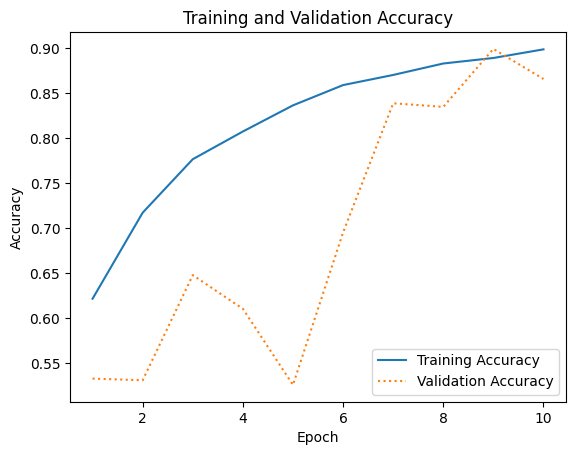

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

[]

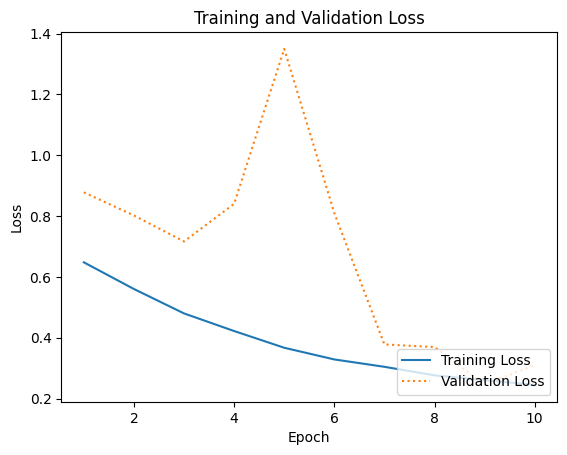

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()